In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from dbn import SupervisedDBNClassification

In [25]:
digits = load_digits()
X, Y = digits.data, digits.target
X = (X / 16)
X = X.astype(np.float32)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [31]:
classifier = SupervisedDBNClassification(hidden_layers_structure=[256, 256],
                                         learning_rate_rbm=0.05,
                                         learning_rate=0.1,
                                         n_epochs_rbm=10,
                                         n_iter_backprop=10,
                                         batch_size=32,
                                         activation_function='relu',
                                         dropout_p=0.2)
history = classifier.fit(X_train, Y_train)

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 2.677150
>> Epoch 2 finished 	RBM Reconstruction error 1.792587
>> Epoch 3 finished 	RBM Reconstruction error 1.491689
>> Epoch 4 finished 	RBM Reconstruction error 1.251158
>> Epoch 5 finished 	RBM Reconstruction error 1.069185
>> Epoch 6 finished 	RBM Reconstruction error 0.998124
>> Epoch 7 finished 	RBM Reconstruction error 1.025981
>> Epoch 8 finished 	RBM Reconstruction error 0.855208
>> Epoch 9 finished 	RBM Reconstruction error 0.832156
>> Epoch 10 finished 	RBM Reconstruction error 0.828340
>> Epoch 1 finished 	RBM Reconstruction error 2.880484
>> Epoch 2 finished 	RBM Reconstruction error 1.567205
>> Epoch 3 finished 	RBM Reconstruction error 1.145315
>> Epoch 4 finished 	RBM Reconstruction error 0.950850
>> Epoch 5 finished 	RBM Reconstruction error 0.805655
>> Epoch 6 finished 	RBM Reconstruction error 0.689051
>> Epoch 7 finished 	RBM Reconstruction error 0.613342
>> Epoch 8 finished 	RBM Reconstructi

In [32]:
Y_pred = classifier.predict(X_test)
print('Done.\nAccuracy: %f' % accuracy_score(Y_test, Y_pred))

Done.
Accuracy: 0.936111


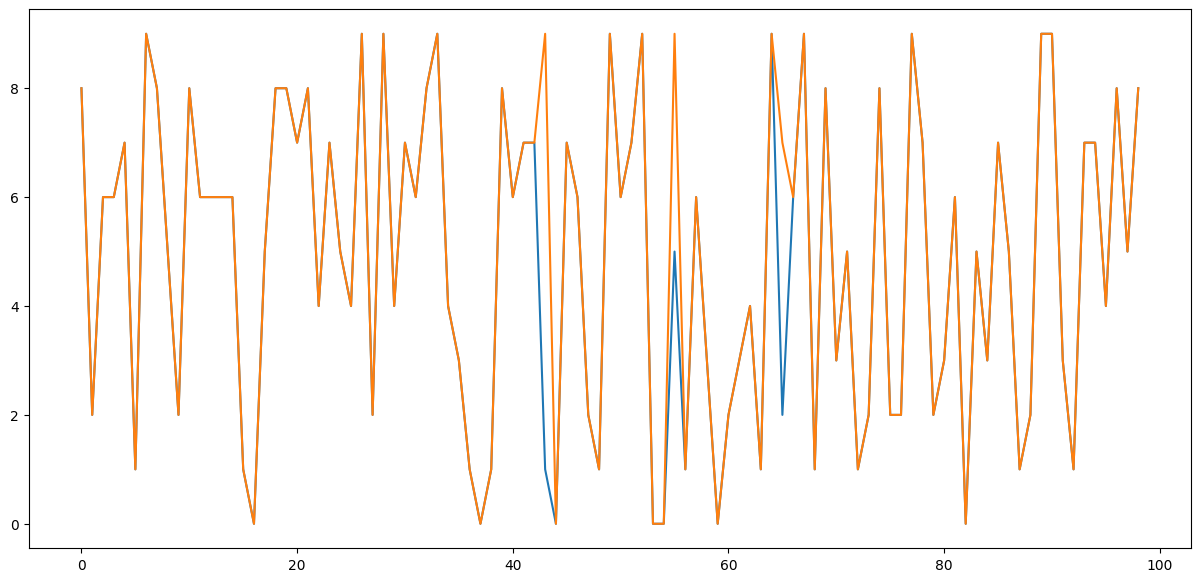

In [44]:
u = 1
l = 100
plt.figure(figsize=(15, 7))
plt.plot(Y_test[u:l], label="Actual")
plt.plot(Y_pred[u:l], label="Predicted")
plt.show()